##  CREDIT  EDA  CASE  STUDY

### PROBLEM STATEMENT

The loan providing companies find it hard to give loans to the people due to their insufficient or non-existent credit history. Because of that, some consumers use it as their advantage by becoming a defaulter. Suppose you work for a consumer finance company which specialises in lending various types of loans to urban customers. You have to use EDA to analyse the patterns present in the data. This will ensure that the applicants capable of repaying the loan are not rejected.

The data  contains the information about the loan application at the time of applying for the loan. It contains two types of scenarios:

-  The client with payment difficulties: he/she had late payment more than X days on at least one of the first Y instalments of    the loan in our sample,

-  All other cases: All other cases when the payment is paid on time.

When a client applies for a loan, there are four types of decisions that could be taken by the client/company:

-  Approved: The Company has approved loan Application

-  Cancelled: The client cancelled the application sometime during approval. Either the client changed her/his mind about the      loan or in some cases due to a higher risk of the client he received worse pricing which he did not want.

-  Refused: The company had rejected the loan (because the client does not meet their requirements etc.).

-  Unused offer:  Loan has been cancelled by the client but on different stages of the process.

######  Two types of risk's are associated with Bank's decision :
-  If the applicant is likely to repay the loan , then not approving the loan results in loss of business to the company.
-  If the applicant is not likely to repay the loan , i.e. he/she is likely to default , then approving the loan may lead to a    financial loss for the company.

######  The company wants to understand the driving factors behind the loan default i.e. the variables which are strong indicaters of default.

In [1]:
# Import the warning
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Importe the useful libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import random
# To display upto 200 rows
pd.set_option('display.max_rows',200)

####  1. Read the dataset - 1) Application_data and 2) previous_application

In [3]:
# Importing application and previous_application dataset
df_app = pd.read_csv("application_data.csv")
df_prev = pd.read_csv("previous_application.csv")

In [4]:
#Checking application data set
df_app

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


######  2. Structure of Data

In [5]:
#Checking rows and column size
df_app.shape

(307511, 122)

In [6]:
df_app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [7]:
df_app.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [8]:
df_app.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

######  3. Data Quality Check and Missing Value

######  i. Percentage of missing values for all the columns in application dataset

In [9]:
#Checking amount of missing values for each column 
round(100*(df_app.isnull().sum()/len(df_app.index)),2)

SK_ID_CURR                       0.00
TARGET                           0.00
NAME_CONTRACT_TYPE               0.00
CODE_GENDER                      0.00
FLAG_OWN_CAR                     0.00
FLAG_OWN_REALTY                  0.00
CNT_CHILDREN                     0.00
AMT_INCOME_TOTAL                 0.00
AMT_CREDIT                       0.00
AMT_ANNUITY                      0.00
AMT_GOODS_PRICE                  0.09
NAME_TYPE_SUITE                  0.42
NAME_INCOME_TYPE                 0.00
NAME_EDUCATION_TYPE              0.00
NAME_FAMILY_STATUS               0.00
NAME_HOUSING_TYPE                0.00
REGION_POPULATION_RELATIVE       0.00
DAYS_BIRTH                       0.00
DAYS_EMPLOYED                    0.00
DAYS_REGISTRATION                0.00
DAYS_ID_PUBLISH                  0.00
OWN_CAR_AGE                     65.99
FLAG_MOBIL                       0.00
FLAG_EMP_PHONE                   0.00
FLAG_WORK_PHONE                  0.00
FLAG_CONT_MOBILE                 0.00
FLAG_PHONE  

######  ii. Dropping the columns with High missing value percentage (>=50)

In [10]:
df_app=df_app.loc[:,df_app.isnull().mean()<=0.5]
df_app

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
# Checking data frame after dropping coumns whichs has missing value percentage greater than or equal to 50%
df_app.shape

(307511, 81)

In [12]:
round(100*(df_app.isnull().sum()/len(df_app.index)),2)

SK_ID_CURR                       0.00
TARGET                           0.00
NAME_CONTRACT_TYPE               0.00
CODE_GENDER                      0.00
FLAG_OWN_CAR                     0.00
FLAG_OWN_REALTY                  0.00
CNT_CHILDREN                     0.00
AMT_INCOME_TOTAL                 0.00
AMT_CREDIT                       0.00
AMT_ANNUITY                      0.00
AMT_GOODS_PRICE                  0.09
NAME_TYPE_SUITE                  0.42
NAME_INCOME_TYPE                 0.00
NAME_EDUCATION_TYPE              0.00
NAME_FAMILY_STATUS               0.00
NAME_HOUSING_TYPE                0.00
REGION_POPULATION_RELATIVE       0.00
DAYS_BIRTH                       0.00
DAYS_EMPLOYED                    0.00
DAYS_REGISTRATION                0.00
DAYS_ID_PUBLISH                  0.00
FLAG_MOBIL                       0.00
FLAG_EMP_PHONE                   0.00
FLAG_WORK_PHONE                  0.00
FLAG_CONT_MOBILE                 0.00
FLAG_PHONE                       0.00
FLAG_EMAIL  

######  iii. Reporting the best matric to import missing values (APPLICATION_DATA) for columns which has less than 13% or so.

These are the columns which has very less percentage (around 13% or so) of Null Values - AMT_GOODS_PRICE(0.09),NAME_TYPE_SUITE(0.42),EXT_SOURCE_2(0.21),DEF_30_CNT_SOCIAL_CIRCLE(0.33),
OBS_60_CNT_SOCIAL_CIRCLE(0.33), AMT_REQ_CREDIT_BUREAU_QRT(13.5), and DEF_30_CNT_SOCIAL_CIRCLE(0.33).
#Unique count >30 -> continuous variable - AMT_GOODS_PRICE, EXT_SOURCE_2, EXT_SOURCE_3.
#Unique count <=30 -> categorical variable - AMT_REQ_CREDIT_BUREAU_QRT , NAME_TYPE_SUITE, DEF_30_CNT_SOCIAL_CIRCLE.

In [13]:
# checking for the columns which are categorical and continuous
# if the unique count is less than or equal to 30 then we consider it as categorical. If it is greater than that it's continuous
df_app.nunique().sort_values()

FLAG_DOCUMENT_3                      2
FLAG_PHONE                           2
FLAG_DOCUMENT_4                      2
FLAG_DOCUMENT_2                      2
REG_REGION_NOT_LIVE_REGION           2
REG_REGION_NOT_WORK_REGION           2
LIVE_REGION_NOT_WORK_REGION          2
REG_CITY_NOT_LIVE_CITY               2
REG_CITY_NOT_WORK_CITY               2
LIVE_CITY_NOT_WORK_CITY              2
FLAG_DOCUMENT_14                     2
FLAG_DOCUMENT_13                     2
FLAG_DOCUMENT_12                     2
FLAG_DOCUMENT_11                     2
FLAG_DOCUMENT_10                     2
FLAG_DOCUMENT_9                      2
FLAG_DOCUMENT_8                      2
FLAG_DOCUMENT_7                      2
EMERGENCYSTATE_MODE                  2
FLAG_DOCUMENT_6                      2
FLAG_CONT_MOBILE                     2
FLAG_WORK_PHONE                      2
FLAG_EMAIL                           2
FLAG_MOBIL                           2
TARGET                               2
NAME_CONTRACT_TYPE       

######  Continuous variable - AMT_GOODS_PRICE, EXT_SOURCE_2, EXT_SOURCE_3 .

In [14]:
df_app.AMT_GOODS_PRICE.describe() 

count    3.072330e+05
mean     5.383962e+05
std      3.694465e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

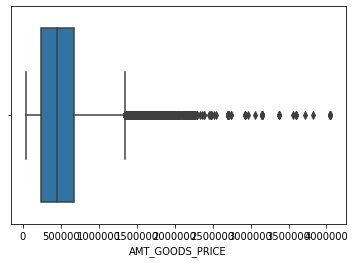

In [15]:
sns.boxplot(df_app.AMT_GOODS_PRICE)
plt.show()   

######  Observation - If we look into the box plot we find that there are resonable amount of outliers. So for this column it is better to impute missing values using Median method

In [17]:
df_app.EXT_SOURCE_2.describe()

count    3.068510e+05
mean     5.143927e-01
std      1.910602e-01
min      8.173617e-08
25%      3.924574e-01
50%      5.659614e-01
75%      6.636171e-01
max      8.549997e-01
Name: EXT_SOURCE_2, dtype: float64

In [18]:
df_app.EXT_SOURCE_2.median()

0.5659614260608526

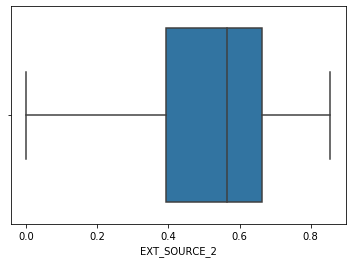

In [19]:
sns.boxplot(df_app.EXT_SOURCE_2)
plt.show()

######  Observation - There are no outliers in this column, whereas mean and median also lies in same range so we can go for mean imputation

In [20]:
df_app.EXT_SOURCE_3.describe()  

count    246546.000000
mean          0.510853
std           0.194844
min           0.000527
25%           0.370650
50%           0.535276
75%           0.669057
max           0.896010
Name: EXT_SOURCE_3, dtype: float64

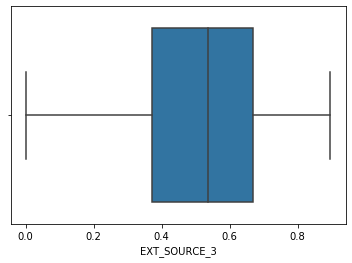

In [21]:
sns.boxplot(df_app.EXT_SOURCE_3)
plt.show()

######  Observation - There are no outliers in this column, whereas mean and median also lies in same range so we can go for mean imputation.

######  Categorical variable - AMT_REQ_CREDIT_BUREAU_QRT , NAME_TYPE_SUITE, DEF_30_CNT_SOCIAL_CIRCLE

In [23]:
df_app['NAME_TYPE_SUITE'].value_counts()

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

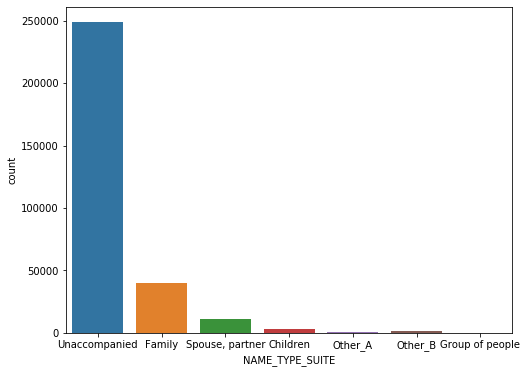

In [24]:
plt.figure(figsize=(8,6))
sns.countplot(x="NAME_TYPE_SUITE", data=df_app)
plt.show()

######  Conclusion - For this column we can impute missing values with Unaccompanied which is most frequently used in application dataset i.e mode() imputation.

In [25]:
df_app['AMT_REQ_CREDIT_BUREAU_QRT'].value_counts()  

0.0      215417
1.0       33862
2.0       14412
3.0        1717
4.0         476
5.0          64
6.0          28
7.0           7
8.0           7
19.0          1
261.0         1
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: int64

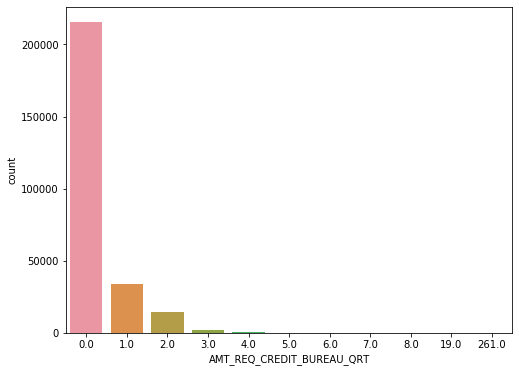

In [26]:
plt.figure(figsize=(8,6))
sns.countplot(x="AMT_REQ_CREDIT_BUREAU_QRT", data=df_app)
plt.show()

######  Conclusion - We can impute missing values with mode() imputation as 0.0 is most occuring value here. 

In [27]:
df_app['DEF_30_CNT_SOCIAL_CIRCLE'].value_counts()

0.0     271324
1.0      28328
2.0       5323
3.0       1192
4.0        253
5.0         56
6.0         11
7.0          1
8.0          1
34.0         1
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: int64

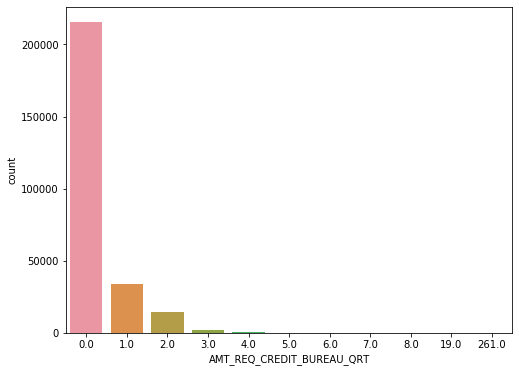

In [28]:
plt.figure(figsize=(8,6))
sns.countplot(x="AMT_REQ_CREDIT_BUREAU_QRT", data=df_app)
plt.show()

######  Conclusion - We can impute missing values with mode() imputation as 0.0 is most occuring value here.

######  iv. Check the datatype of columns

In [29]:
df_app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 81 columns):
SK_ID_CURR                      307511 non-null int64
TARGET                          307511 non-null int64
NAME_CONTRACT_TYPE              307511 non-null object
CODE_GENDER                     307511 non-null object
FLAG_OWN_CAR                    307511 non-null object
FLAG_OWN_REALTY                 307511 non-null object
CNT_CHILDREN                    307511 non-null int64
AMT_INCOME_TOTAL                307511 non-null float64
AMT_CREDIT                      307511 non-null float64
AMT_ANNUITY                     307499 non-null float64
AMT_GOODS_PRICE                 307233 non-null float64
NAME_TYPE_SUITE                 306219 non-null object
NAME_INCOME_TYPE                307511 non-null object
NAME_EDUCATION_TYPE             307511 non-null object
NAME_FAMILY_STATUS              307511 non-null object
NAME_HOUSING_TYPE               307511 non-null object
REGION_P

######  Change the value of columns which are negative. Here DAYS_BIRTH, DAYS_EMPLOYED , DAYS_REGISTRATION ,DAYS_ID_PUBLISH and DAYS_LAST_PHONE_CHANGE columns has negative values.

In [30]:
df_app['DAYS_BIRTH']

0         -9461
1        -16765
2        -19046
3        -19005
4        -19932
          ...  
307506    -9327
307507   -20775
307508   -14966
307509   -11961
307510   -16856
Name: DAYS_BIRTH, Length: 307511, dtype: int64

In [31]:
df_app['DAYS_BIRTH']=df_app['DAYS_BIRTH'].abs()

###### We are using abs function to convert negative value to positive

In [32]:
df_app['DAYS_BIRTH']

0          9461
1         16765
2         19046
3         19005
4         19932
          ...  
307506     9327
307507    20775
307508    14966
307509    11961
307510    16856
Name: DAYS_BIRTH, Length: 307511, dtype: int64

In [33]:
df_app['DAYS_EMPLOYED']=df_app['DAYS_EMPLOYED'].abs()

In [34]:
df_app['DAYS_REGISTRATION']=df_app['DAYS_REGISTRATION'].abs()

In [35]:
df_app['DAYS_ID_PUBLISH']=df_app['DAYS_ID_PUBLISH'].abs()

In [36]:
df_app['DAYS_ID_PUBLISH']

0         2120
1          291
2         2531
3         2437
4         3458
          ... 
307506    1982
307507    4090
307508    5150
307509     931
307510     410
Name: DAYS_ID_PUBLISH, Length: 307511, dtype: int64

In [37]:
df_app['DAYS_LAST_PHONE_CHANGE']=df_app['DAYS_LAST_PHONE_CHANGE'].abs()

######  v. Check the Outliers for numerical columns

In [38]:
df_app['CNT_CHILDREN'].describe()

count    307511.000000
mean          0.417052
std           0.722121
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          19.000000
Name: CNT_CHILDREN, dtype: float64

In [39]:
df_app.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,16036.995067,67724.742149,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,139443.751806,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,7489.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,12413.000000,933.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,15750.000000,2219.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,19682.000000,5707.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,25229.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [40]:
df_app.CNT_CHILDREN.value_counts()

0     215371
1      61119
2      26749
3       3717
4        429
5         84
6         21
7          7
14         3
19         2
12         2
10         2
9          2
8          2
11         1
Name: CNT_CHILDREN, dtype: int64

In [41]:
df_app.CNT_CHILDREN.describe()

count    307511.000000
mean          0.417052
std           0.722121
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          19.000000
Name: CNT_CHILDREN, dtype: float64

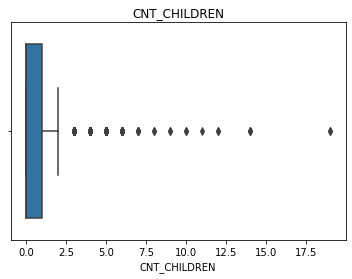

In [42]:
# 1. CNT_CHILDREN - In this column max value of children showing 19 but no one has 19 children so we consider this is an outlier.
sns.boxplot(df_app['CNT_CHILDREN'])
plt.title('CNT_CHILDREN')

plt.show()

######  Observations - Now a days it is common to have 2-3 kids per family. There might be some exeception where we find family with 4-5 kids, keeping it in mind if we look into data it is unreal to have children greater than 8 or so. And if they have also it will be an exception.

In [43]:
# Normalizing data so that we can visualize values better
df_app['AMT_INCOME_TOTAL'] = df_app['AMT_INCOME_TOTAL']/100000

In [44]:
df_app['AMT_INCOME_TOTAL'].describe()

count    307511.000000
mean          1.687979
std           2.371231
min           0.256500
25%           1.125000
50%           1.471500
75%           2.025000
max        1170.000000
Name: AMT_INCOME_TOTAL, dtype: float64

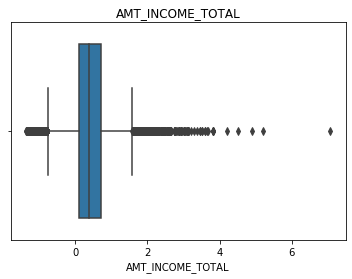

In [45]:
# 2. AMT_INCOME_TOTAL
sns.boxplot(np.log(df_app['AMT_INCOME_TOTAL']))
plt.title('AMT_INCOME_TOTAL')

plt.show()

######  Observation - Outliers is present in AMT_INCOME_TOTAL column as if we look and compare max() value with others we can easily say that max value is outlier.  Mode and 75% perenctile are very less compared to Max.

In [46]:
# Normalizing data so that we can visualize values better
df_app['AMT_CREDIT'] = df_app['AMT_CREDIT']/100000

In [47]:
df_app['AMT_CREDIT'].describe()

count    307511.000000
mean          5.990260
std           4.024908
min           0.450000
25%           2.700000
50%           5.135310
75%           8.086500
max          40.500000
Name: AMT_CREDIT, dtype: float64

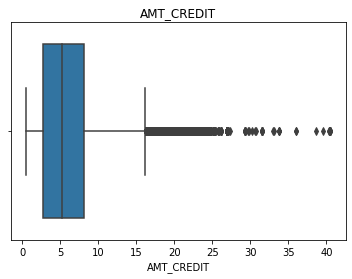

In [48]:
# 3. AMT_CREDIT 
sns.boxplot(df_app['AMT_CREDIT'])
plt.title('AMT_CREDIT')

plt.show()

######  Observation - Outliers is present in AMT_CREDIT column as if we look and compare max() value with others we can easily say that max value is outlier value which is greater than 75% percentile.

In [49]:
# 4. AMT_ANNUITY 
df_app['AMT_ANNUITY'].describe()

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

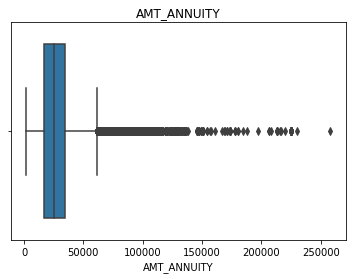

In [50]:
sns.boxplot(df_app['AMT_ANNUITY'])
plt.title('AMT_ANNUITY')
plt.show()

######  Observation - Outliers is present in AMT_ANNUITY column as if we look and compare max() value with others we can easily say that max value is outlier value which is greater than mean, mode and 75% percentile.

In [51]:
# Normalizing data so that we can visualize values better
df_app['AMT_GOODS_PRICE'] = df_app['AMT_GOODS_PRICE']/100000

In [52]:
# 5.AMT_GOODS_PRICE
df_app['AMT_GOODS_PRICE'].describe()

count    307233.000000
mean          5.383962
std           3.694465
min           0.405000
25%           2.385000
50%           4.500000
75%           6.795000
max          40.500000
Name: AMT_GOODS_PRICE, dtype: float64

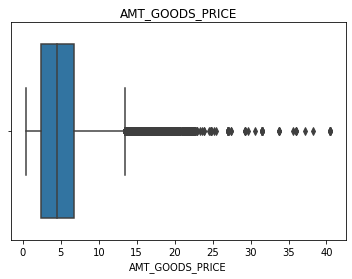

In [53]:
sns.boxplot(df_app['AMT_GOODS_PRICE'])
plt.title('AMT_GOODS_PRICE')
plt.show()

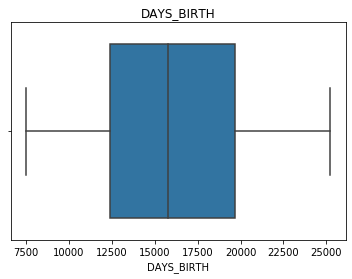

In [54]:
#6. DAYS_BIRTH 
sns.boxplot(df_app['DAYS_BIRTH'])
plt.title('DAYS_BIRTH')

plt.show()

In [55]:
df_app['DAYS_BIRTH'].describe()

count    307511.000000
mean      16036.995067
std        4363.988632
min        7489.000000
25%       12413.000000
50%       15750.000000
75%       19682.000000
max       25229.000000
Name: DAYS_BIRTH, dtype: float64

######  Observation - In Days_Birth column , as per it's mean , mode and max value percentage we can easily say that it doesn't have any outliers present.

######  vi. BINNING

In [56]:
df_app['AMT_INCOME_TOTAL'].describe()

count    307511.000000
mean          1.687979
std           2.371231
min           0.256500
25%           1.125000
50%           1.471500
75%           2.025000
max        1170.000000
Name: AMT_INCOME_TOTAL, dtype: float64

In [57]:
# Creating bins on AMT_INCOME_TOTAL column in Lakhs
bins = [0,1.0,2.0,3.0,4.0,5.0,100000]
labels = ['0-1.0L','1.0L-2.0L','2.0L-3.0L','3.0L-4.0L','4.0L-5.0L','5.0L and Above']

df_app['AMT_INCOME_RANGE']=pd.cut(df_app['AMT_INCOME_TOTAL'],bins,labels=labels)

In [58]:
# Creating bins on AMT_CREDIT column in Lakhs
bins = [0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10000]
labels = ['0-1.0L', '1.0L-2.0L','2.0L-3.0L', '3.0L-4.0L','4.0L-5.0L','5.0L-6.0L','6.0L-7.0L','7.0L-8.0L',
        '8.0L-9.0L','9.0L and Above']

df_app['AMT_CREDIT_RANGE']=pd.cut(df_app['AMT_CREDIT'],bins=bins,labels=labels)

In [59]:
df_app.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_INCOME_RANGE,AMT_CREDIT_RANGE
0,100002,1,Cash loans,M,N,Y,0,2.025,4.065975,24700.5,...,0,0,0.0,0.0,0.0,0.0,0.0,1.0,2.0L-3.0L,4.0L-5.0L
1,100003,0,Cash loans,F,N,N,0,2.700,12.935025,35698.5,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,2.0L-3.0L,9.0L and Above
2,100004,0,Revolving loans,M,Y,Y,0,0.675,1.350000,6750.0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0-1.0L,1.0L-2.0L
3,100006,0,Cash loans,F,N,Y,0,1.350,3.126825,29686.5,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,1.0L-2.0L,3.0L-4.0L
4,100007,0,Cash loans,M,N,Y,0,1.215,5.130000,21865.5,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0L-2.0L,5.0L-6.0L


######  4. ANALYSIS

######  i. To check imbalance percentage

In [60]:
# Before doing analysis , we need to drop the unused columns from the dataset
Unused_Col=['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL','CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY',
        'DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE',
        'YEARS_BEGINEXPLUATATION_AVG','FLOORSMAX_AVG','YEARS_BEGINEXPLUATATION_MODE','FLOORSMAX_MODE','YEARS_BEGINEXPLUATATION_MEDI', 
        'FLOORSMAX_MEDI','TOTALAREA_MODE','EMERGENCYSTATE_MODE',
        'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']

df_app.drop(labels=Unused_Col,axis=1,inplace=True)

In [61]:
df_app.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_INCOME_RANGE,AMT_CREDIT_RANGE
0,100002,1,Cash loans,M,N,Y,0,2.025,4.065975,24700.5,...,0.139376,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0L-3.0L,4.0L-5.0L
1,100003,0,Cash loans,F,N,N,0,2.700,12.935025,35698.5,...,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0L-3.0L,9.0L and Above
2,100004,0,Revolving loans,M,Y,Y,0,0.675,1.350000,6750.0,...,0.729567,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0-1.0L,1.0L-2.0L
3,100006,0,Cash loans,F,N,Y,0,1.350,3.126825,29686.5,...,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0L-2.0L,3.0L-4.0L
4,100007,0,Cash loans,M,N,Y,0,1.215,5.130000,21865.5,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0L-2.0L,5.0L-6.0L


In [62]:
# As per the our observation of datasets CODE_GENDER has 3 values i.e. M , F and XNA (Not defined).
# Check the total count of Male, Female and XNA Gender
df_app['CODE_GENDER'].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [63]:
# Here Updating the column 'CODE_GENDER' with "F" as we have only 4 values in XNA and will be no impact if we impute F.

df_app.loc[df_app['CODE_GENDER']=='XNA','CODE_GENDER']='F'
df_app['CODE_GENDER'].value_counts()

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

######  ii. Divide the dataset into two  i.e. Target=1 and Target=0

In [64]:
# First we need to divide the Application datasets into Target1 (Client with Payment difficulties :he/she had late payment more 
#than X days on at least one of the first Y installments of the loan in our sample ) and Target0 (all other cases) variable
Target1 = df_app.loc[df_app["TARGET"]==1]

In [65]:
Target1

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_INCOME_RANGE,AMT_CREDIT_RANGE
0,100002,1,Cash loans,M,N,Y,0,2.025,4.065975,24700.5,...,0.139376,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0L-3.0L,4.0L-5.0L
26,100031,1,Cash loans,F,N,Y,0,1.125,9.799920,27076.5,...,0.190706,10.0,0.0,0.0,0.0,0.0,2.0,2.0,1.0L-2.0L,9.0L and Above
40,100047,1,Cash loans,M,N,Y,0,2.025,11.935800,35028.0,...,0.320163,0.0,0.0,0.0,0.0,2.0,0.0,4.0,2.0L-3.0L,9.0L and Above
42,100049,1,Cash loans,F,N,N,0,1.350,2.888730,16258.5,...,0.399676,1.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0L-2.0L,2.0L-3.0L
81,100096,1,Cash loans,F,N,Y,0,0.810,2.520000,14593.5,...,0.720944,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0-1.0L,2.0L-3.0L
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307448,456186,1,Cash loans,M,N,N,1,2.070,4.500000,32746.5,...,0.360613,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0L-3.0L,4.0L-5.0L
307475,456215,1,Cash loans,F,N,N,1,1.440,13.032000,46809.0,...,0.424130,0.0,0.0,0.0,0.0,1.0,0.0,6.0,1.0L-2.0L,9.0L and Above
307481,456225,1,Cash loans,M,N,Y,0,2.250,2.970000,19975.5,...,0.511892,0.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0L-3.0L,2.0L-3.0L
307489,456233,1,Cash loans,F,N,Y,0,2.250,5.212800,23089.5,...,0.397946,1.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0L-3.0L,5.0L-6.0L


In [66]:
Target0 = df_app.loc[df_app["TARGET"]==0]
#Target0

In [67]:
Target0

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_INCOME_RANGE,AMT_CREDIT_RANGE
1,100003,0,Cash loans,F,N,N,0,2.700,12.935025,35698.5,...,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0L-3.0L,9.0L and Above
2,100004,0,Revolving loans,M,Y,Y,0,0.675,1.350000,6750.0,...,0.729567,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0-1.0L,1.0L-2.0L
3,100006,0,Cash loans,F,N,Y,0,1.350,3.126825,29686.5,...,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0L-2.0L,3.0L-4.0L
4,100007,0,Cash loans,M,N,Y,0,1.215,5.130000,21865.5,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0L-2.0L,5.0L-6.0L
5,100008,0,Cash loans,M,N,Y,0,0.990,4.904955,27517.5,...,0.621226,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0-1.0L,4.0L-5.0L
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307505,456249,0,Cash loans,F,N,Y,0,1.125,2.250000,22050.0,...,0.742182,0.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0L-2.0L,2.0L-3.0L
307506,456251,0,Cash loans,M,N,N,0,1.575,2.547000,27558.0,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0L-2.0L,2.0L-3.0L
307507,456252,0,Cash loans,F,N,Y,0,0.720,2.695500,12001.5,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0-1.0L,2.0L-3.0L
307508,456253,0,Cash loans,F,N,Y,0,1.530,6.776640,29979.0,...,0.218859,6.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0L-2.0L,6.0L-7.0L


###### Calculating Imbalance percentage

In [68]:
round(100*(len(Target0.index)/len(df_app.index)),2)
#Target0 has approximately 92% of data

91.93

In [69]:
round(100*(len(Target1.index)/len(df_app.index)),2)
#Target1 has approximately 8% of data
# This shows imbalance in data

8.07

In [70]:
df_app.nunique().sort_values() 

LIVE_REGION_NOT_WORK_REGION         2
TARGET                              2
NAME_CONTRACT_TYPE                  2
CODE_GENDER                         2
FLAG_OWN_CAR                        2
FLAG_OWN_REALTY                     2
REG_REGION_NOT_LIVE_REGION          2
LIVE_CITY_NOT_WORK_CITY             2
REG_CITY_NOT_WORK_CITY              2
REG_CITY_NOT_LIVE_CITY              2
REG_REGION_NOT_WORK_REGION          2
NAME_EDUCATION_TYPE                 5
AMT_REQ_CREDIT_BUREAU_HOUR          5
NAME_FAMILY_STATUS                  6
NAME_HOUSING_TYPE                   6
AMT_INCOME_RANGE                    6
NAME_TYPE_SUITE                     7
WEEKDAY_APPR_PROCESS_START          7
NAME_INCOME_TYPE                    8
AMT_REQ_CREDIT_BUREAU_WEEK          9
AMT_REQ_CREDIT_BUREAU_DAY           9
AMT_CREDIT_RANGE                   10
AMT_REQ_CREDIT_BUREAU_QRT          11
CNT_CHILDREN                       15
OCCUPATION_TYPE                    18
AMT_REQ_CREDIT_BUREAU_MON          24
HOUR_APPR_PR

######  iii. Perform the Univariate analysis for categorical variables for both Target 0 and Target 1
######  Target0

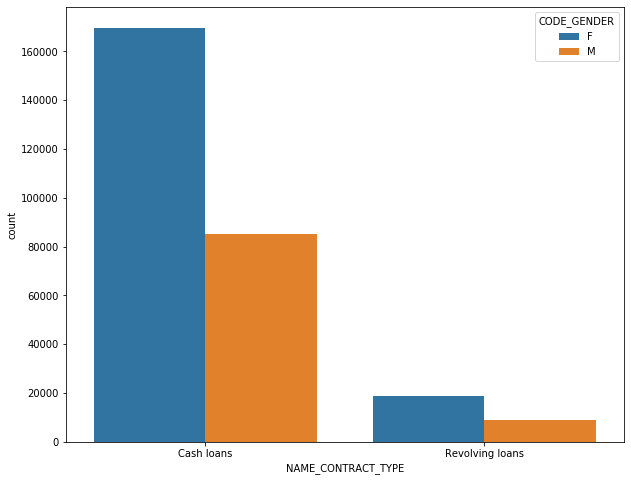

In [71]:
#Use countplot to count the no. of observation across categorical variables for TARGET0
plt.figure(figsize=(10, 8))
sns.countplot(x="NAME_CONTRACT_TYPE", hue='CODE_GENDER', data=Target0)
plt.show()
#contract type ‘cash loans’ is having higher number of credits than ‘Revolving loans’ contract type

######  Observations 
1. Contract Type Cash Loans is having higher number of credits than Revolving Loans contract type.
2. Credits are more in Female than Male.

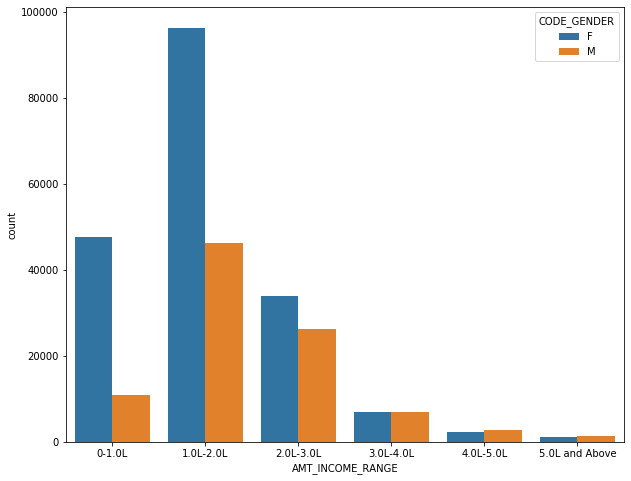

In [72]:
plt.figure(figsize=(10, 8))
#plt.yscale('log')
sns.countplot(x="AMT_INCOME_RANGE", hue='CODE_GENDER', data=Target0)
plt.show()
#Female counts are more than Male counts in income range. 

###### Observations
1. Females are leading in income range 0 to 2.0L than Male population.
2. Majority of the high Income range falls for Female between for 1.0L-2.0L and low in 4.0L-Above range.

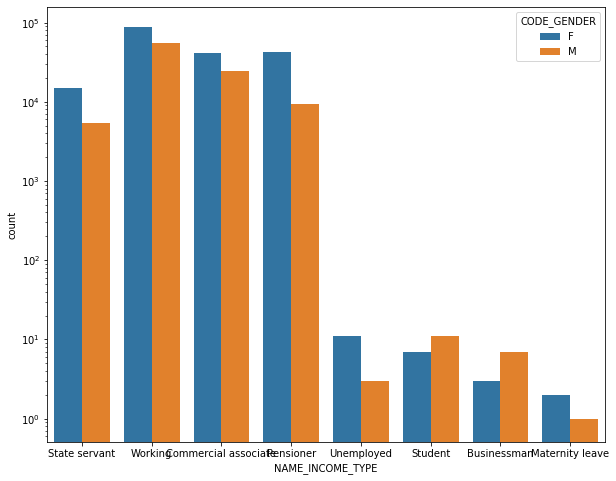

In [73]:
plt.figure(figsize=(10, 8))
plt.yscale('log')
sns.countplot(x="NAME_INCOME_TYPE", hue='CODE_GENDER', data=Target0)
plt.show()
#Working , Commercial associate and Pensioner Female are having more no of credits than Male.

######  Observations
1. For income type Working , Commercial associate , Pensioner are having more credits than other income type.
2. For income type Student , Businessman and Maternity Leave income type has very no. of credits.

######  Target1

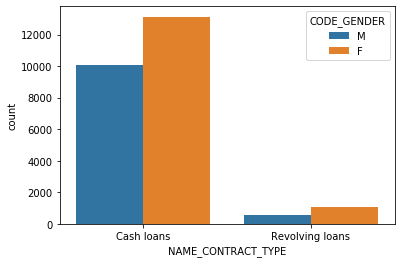

In [74]:
#Use countplot to count the no. of observation across categorical variables for TARGET0
plt.figure(figsize=(6, 4))
sns.countplot(x="NAME_CONTRACT_TYPE", hue='CODE_GENDER', data=Target1)
plt.show()
#contract type ‘cash loans’ is having higher number of credits than ‘Revolving loans’ contract type

######  Observations
1. Contract Type Cash Loans is having higher number of credits than Revolving loans contract type .
2. Females are having more counts than Male in both Contract type.

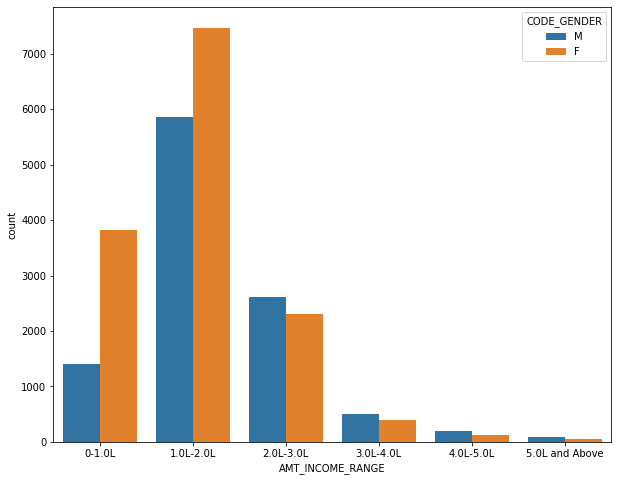

In [75]:
plt.figure(figsize=(10, 8))
sns.countplot(x="AMT_INCOME_RANGE", hue='CODE_GENDER', data=Target1)
plt.show()
# Female counts are more than Male counts in income type
# Income Range 0.75-1.0,1.0-1.25, 1.25-1.5 are having high income range in Female as compared to Male.
# Very low income range is in 8.0 - 8.5 , 8.5 - 9.0.

######  Observations
1. Income Range 0.-1.0L , 1.0L – 2.0L are having high income range for  Female as compared to Male.
2. Very low income range is in 4.0 – 5.0, 5.0 and Above for both Male and Female population.
3. Male income is more than female in 2.0 to 3.0 and above.

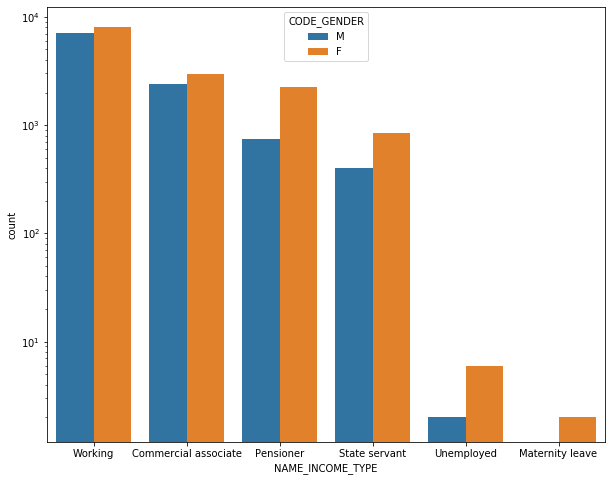

In [76]:
plt.figure(figsize=(10, 8))
plt.yscale('log')
sns.countplot(x="NAME_INCOME_TYPE", hue='CODE_GENDER', data=Target1)
plt.show()
# In all the income type Female are leading than Male.
# For the income type Working , Commercial Associate , PEnsioner and State Servant are in descending order of Income Type.
# Less income type is Maternity Leave.

######  Observations
1. For the income type Working , Commercial Associate , Pensioner and State Servant are in descending order of Income Type.
2. Less income type is Maternity Leave.
3. Females are leading in all income type than Male.

######  Overall Observation --> Univariate analysis for categorical variables for both Target 0 and Target 1 has same result.

######  iv. Correlation for numerical columns for both the cases, i.e. 0 and 1

In [77]:
Target_1=Target1.iloc[0:,2:]
Target_0=Target0.iloc[0:,2:]

Target1_Corr=Target_1.corr()
Target0_Corr=Target_0.corr()

In [78]:
Target1_Corr

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,...,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
CNT_CHILDREN,1.000000,0.004796,-0.001675,0.031257,-0.008112,-0.031975,-0.259109,-0.192864,-0.149154,0.032299,...,0.053515,-0.012260,-0.020268,0.025804,-0.000382,-0.013004,-0.011792,-0.012583,-0.018174,-0.035427
AMT_INCOME_TOTAL,0.004796,1.000000,0.038131,0.046421,0.037583,0.009135,-0.003096,-0.014977,-0.000158,0.004215,...,-0.001353,0.007154,-0.015110,-0.004709,0.000656,-0.000272,0.000018,0.004114,-0.001133,0.001752
AMT_CREDIT,-0.001675,0.038131,1.000000,0.752195,0.983103,0.069161,0.135316,0.001930,0.025854,0.052329,...,-0.016509,0.120848,0.077698,0.019098,-0.005981,0.003008,0.007650,0.055038,-0.017467,-0.035719
AMT_ANNUITY,0.031257,0.046421,0.752195,1.000000,0.752699,0.071690,0.014303,-0.081207,-0.034279,0.016767,...,0.009902,0.116305,0.041415,0.004463,0.014039,-0.000294,0.031242,0.053413,-0.010205,-0.013841
AMT_GOODS_PRICE,-0.008112,0.037583,0.983103,0.752699,1.000000,0.076049,0.135810,0.006642,0.025679,0.056086,...,-0.016685,0.131184,0.078754,0.019921,-0.004496,0.004280,0.007980,0.058558,-0.016024,-0.037848
REGION_POPULATION_RELATIVE,-0.031975,0.009135,0.069161,0.071690,0.076049,1.000000,0.048190,0.015532,0.056222,0.015537,...,-0.020428,0.169751,-0.009810,0.006224,-0.001238,-0.005483,0.002904,0.071329,-0.007299,0.000602
DAYS_BIRTH,-0.259109,-0.003096,0.135316,0.014303,0.135810,0.048190,1.000000,0.582185,0.289114,0.252863,...,-0.123623,0.108662,0.171621,0.005164,-0.014654,0.007248,0.005537,0.005713,0.017214,0.084192
DAYS_EMPLOYED,-0.192864,-0.014977,0.001930,-0.081207,0.006642,0.015532,0.582185,1.000000,0.192455,0.229090,...,-0.198484,0.001100,0.096229,-0.008019,-0.007914,0.021520,0.014952,-0.025091,0.014426,0.035786
DAYS_REGISTRATION,-0.149154,-0.000158,0.025854,-0.034279,0.025679,0.056222,0.289114,0.192455,1.000000,0.096833,...,-0.062636,0.069996,0.086099,-0.014104,0.004984,0.008367,-0.003130,-0.004876,0.012457,0.013321
DAYS_ID_PUBLISH,0.032299,0.004215,0.052329,0.016767,0.056086,0.015537,0.252863,0.229090,0.096833,1.000000,...,-0.031431,0.059814,0.128268,0.019968,-0.003837,0.012654,-0.003047,0.014166,-0.007995,0.041730


In [79]:
Target0_Corr

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,...,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
CNT_CHILDREN,1.000000,0.027397,0.003081,0.020905,-0.000525,-0.024363,-0.336966,-0.245174,-0.185792,0.028751,...,0.070988,-0.015455,-0.041729,0.014471,-0.000432,0.000648,-0.001632,-0.010455,-0.007087,-0.042547
AMT_INCOME_TOTAL,0.027397,1.000000,0.342799,0.418953,0.349462,0.167851,-0.062609,-0.140392,-0.064937,-0.022896,...,0.020684,0.139598,-0.072401,-0.027828,0.001417,0.007862,0.006234,0.061470,0.013128,0.029536
AMT_CREDIT,0.003081,0.342799,1.000000,0.771309,0.987250,0.100604,0.047378,-0.070104,-0.013477,0.001464,...,0.002506,0.129140,0.036085,-0.000914,-0.003734,0.004409,-0.001883,0.054071,0.017767,-0.048866
AMT_ANNUITY,0.020905,0.418953,0.771309,1.000000,0.776686,0.120988,-0.012263,-0.104978,-0.039436,-0.014113,...,0.010582,0.126615,0.028051,-0.013091,0.003148,0.002392,0.012681,0.038181,0.011248,-0.010882
AMT_GOODS_PRICE,-0.000525,0.349462,0.987250,0.776686,1.000000,0.103827,0.044565,-0.068609,-0.015916,0.003649,...,0.001310,0.135694,0.038908,-0.000707,-0.003116,0.004820,-0.001597,0.055850,0.018163,-0.051266
REGION_POPULATION_RELATIVE,-0.024363,0.167851,0.100604,0.120988,0.103827,1.000000,0.025244,-0.007198,0.052083,0.001071,...,-0.013502,0.198493,-0.012486,-0.012107,-0.002265,0.001969,-0.002480,0.078629,-0.001013,0.001775
DAYS_BIRTH,-0.336966,-0.062609,0.047378,-0.012263,0.044565,0.025244,1.000000,0.626114,0.333151,0.271314,...,-0.160072,0.078158,0.197287,-0.007726,-0.004461,-0.002772,0.001069,-0.002855,0.011335,0.072886
DAYS_EMPLOYED,-0.245174,-0.140392,-0.070104,-0.104978,-0.068609,-0.007198,0.626114,1.000000,0.214511,0.276663,...,-0.221387,-0.028530,0.111995,0.007272,-0.004460,-0.000874,0.002223,-0.034890,0.015116,0.052169
DAYS_REGISTRATION,-0.185792,-0.064937,-0.013477,-0.039436,-0.015916,0.052083,0.333151,0.214511,1.000000,0.100236,...,-0.072248,0.052503,0.103476,-0.008315,0.002730,0.000035,0.001431,0.011857,0.000527,0.026639
DAYS_ID_PUBLISH,0.028751,-0.022896,0.001464,-0.014113,0.003649,0.001071,0.271314,0.276663,0.100236,1.000000,...,-0.062259,0.041703,0.124715,0.012326,-0.004797,0.000198,0.001655,0.008728,0.007071,0.035639


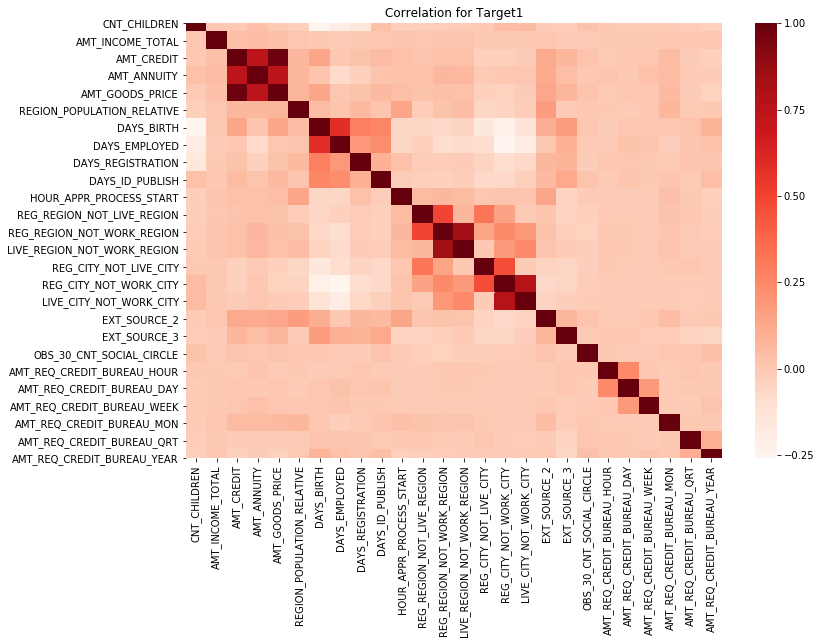

In [80]:
plt.figure(figsize=(12,8))
sns.heatmap(data=Target1_Corr, annot=False, cmap='Reds')
plt.title('Correlation for Target1')
plt.show()

######  Observations 
-  AMT_GOODS_PRICE and AMT_CREDIT are strong positively correlated.
-  AMT_GOODS_PRICE and AMT_ANNUITY are strongly correlated.
-  AMT_ANNUITY and AMT_CREDIT are strongly correlated.
-  LIVE_REGION_NOT_WORK_REGION and REG_REGION_NOT_WORK_REGION are strongly correlated.
-  LIVE_CITY_NOT_WORK_CITY and REG_CITY_NOT_WORK_CITY are strongly correlated.

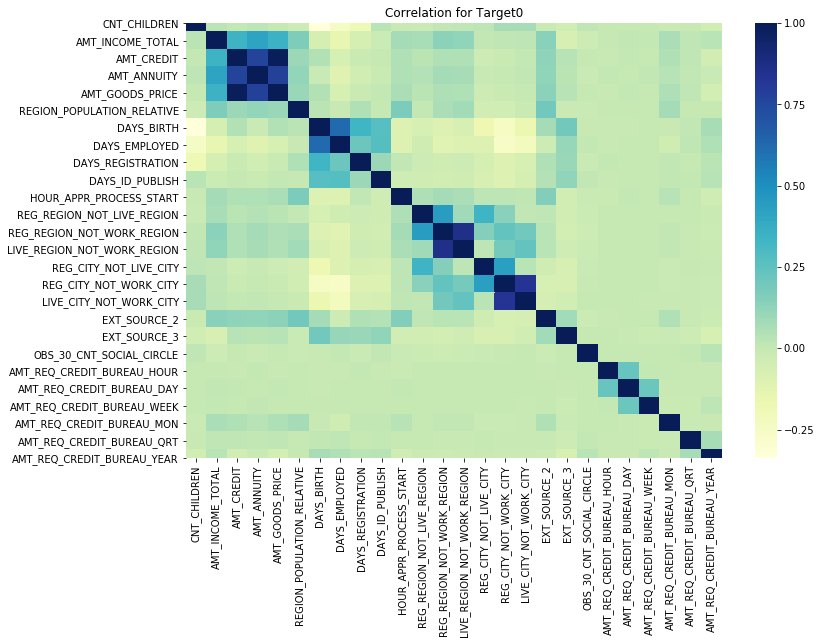

In [81]:
plt.figure(figsize=(12,8))
sns.heatmap(data=Target0_Corr, annot=False, cmap='YlGnBu')
plt.title('Correlation for Target0')
plt.show()

######  Observations 
- AMT_GOODS_PRICE and AMT_CREDIT are strong positively correlated.
-  AMT_GOODS_PRICE and AMT_ANNUITY are strongly correlated.
-  AMT_ANNUITY and AMT_CREDIT are strongly correlated.
-  LIVE_REGION_NOT_WORK_REGION and REG_REGION_NOT_WORK_REGION are strongly correlated.
-  LIVE_CITY_NOT_WORK_CITY and REG_CITY_NOT_WORK_CITY are strongly correlated.

######  v. Check the variables with highest correlation are the same in both the files or not?

-  YES ,the variables with highest correlation are same in both the files.

######  vi. Univariate for numerical variables for both 0 and 1. Compared the target variable across categories of continuous variables.

In [82]:
df_app.nunique().sort_values()

LIVE_REGION_NOT_WORK_REGION         2
TARGET                              2
NAME_CONTRACT_TYPE                  2
CODE_GENDER                         2
FLAG_OWN_CAR                        2
FLAG_OWN_REALTY                     2
REG_REGION_NOT_LIVE_REGION          2
LIVE_CITY_NOT_WORK_CITY             2
REG_CITY_NOT_WORK_CITY              2
REG_CITY_NOT_LIVE_CITY              2
REG_REGION_NOT_WORK_REGION          2
NAME_EDUCATION_TYPE                 5
AMT_REQ_CREDIT_BUREAU_HOUR          5
NAME_FAMILY_STATUS                  6
NAME_HOUSING_TYPE                   6
AMT_INCOME_RANGE                    6
NAME_TYPE_SUITE                     7
WEEKDAY_APPR_PROCESS_START          7
NAME_INCOME_TYPE                    8
AMT_REQ_CREDIT_BUREAU_WEEK          9
AMT_REQ_CREDIT_BUREAU_DAY           9
AMT_CREDIT_RANGE                   10
AMT_REQ_CREDIT_BUREAU_QRT          11
CNT_CHILDREN                       15
OCCUPATION_TYPE                    18
AMT_REQ_CREDIT_BUREAU_MON          24
HOUR_APPR_PR

######  Target0 - Univariate Analysis on numerical variable

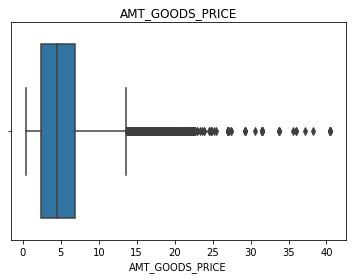

In [83]:
# 1. AMT_GOODS_PRICE -
sns.boxplot(Target0['AMT_GOODS_PRICE'])
plt.title('AMT_GOODS_PRICE')
plt.show()
# Outliers present in AMT_GOODS_PRICE

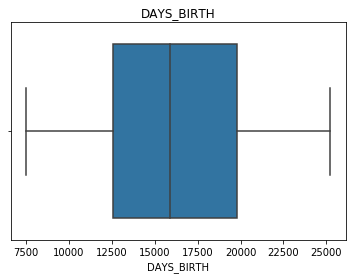

In [84]:
# 2. DAYS_BIRTH -
sns.boxplot(Target0['DAYS_BIRTH'])
plt.title('DAYS_BIRTH')
plt.show()
#THere is no outliers in DAYS_BIRTH

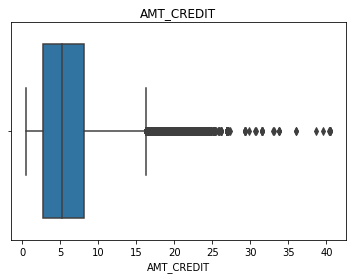

In [85]:
# 3. AMT_CREDIT -
sns.boxplot(Target0['AMT_CREDIT'])
plt.title('AMT_CREDIT')
plt.show()
#Outliers present in AMT_CREDIT

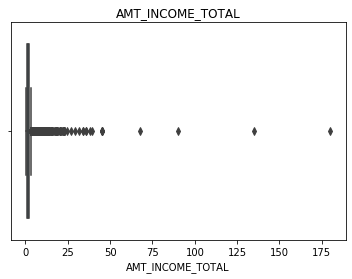

In [86]:
# 4. AMT_INCOME_TOTAL -
sns.boxplot(Target0['AMT_INCOME_TOTAL'])
plt.title('AMT_INCOME_TOTAL')
plt.show()
#Outliers present in AMT_INCOME_TOTAL

######  Target1 - Univariate Analysis on numerical variable 

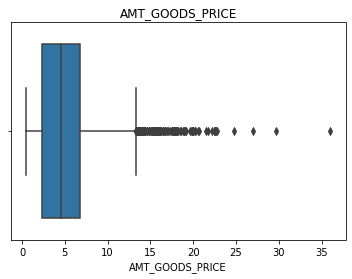

In [87]:
# 1. AMT_GOODS_PRICE - 
sns.boxplot(Target1['AMT_GOODS_PRICE'])
plt.title('AMT_GOODS_PRICE')
plt.show()

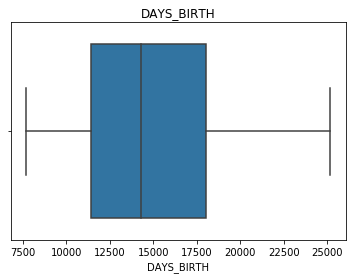

In [88]:
# 2. DAYS_BIRTH -
sns.boxplot(Target1['DAYS_BIRTH'])
plt.title('DAYS_BIRTH')
plt.show()

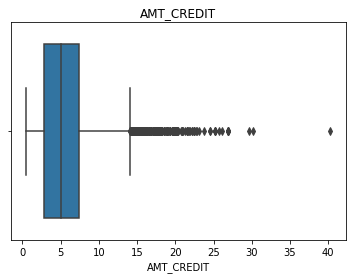

In [89]:
# 3. AMT_CREDIT -
sns.boxplot(Target1['AMT_CREDIT'])
plt.title('AMT_CREDIT')
plt.show()

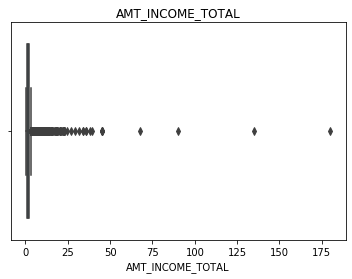

In [90]:
# 4. AMT_INCOME_TOTAL -
sns.boxplot(Target0['AMT_INCOME_TOTAL'])
plt.title('AMT_INCOME_TOTAL')
plt.show()

######  Observation - 
1.  Univariate for numerical variables for both Target0 and Target1 are having outliers in same columns i.e. AMT_GOODS_PRICE ,      AMT_CREDIT , AMT_INCOME_TOTAL. 
2.  And DAYS_BIRTH are having no outliers in both Target0 and Target1. 

######  vii. Bivariate analysis for numerical variables.

######  Target 1

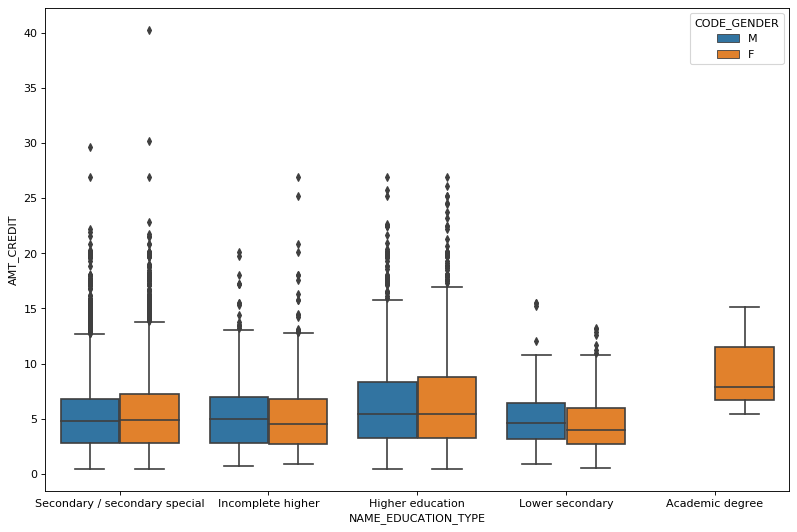

In [91]:
# set figure size for larger figure
plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')
sns.boxplot(x='NAME_EDUCATION_TYPE', y='AMT_CREDIT', hue="CODE_GENDER", data=Target1)
plt.show()

######  Observations
1. Female with Academic degree are having more credits than Male/Female with other education type.
2. Lower secondary education type has less credits for Male and Female gender.

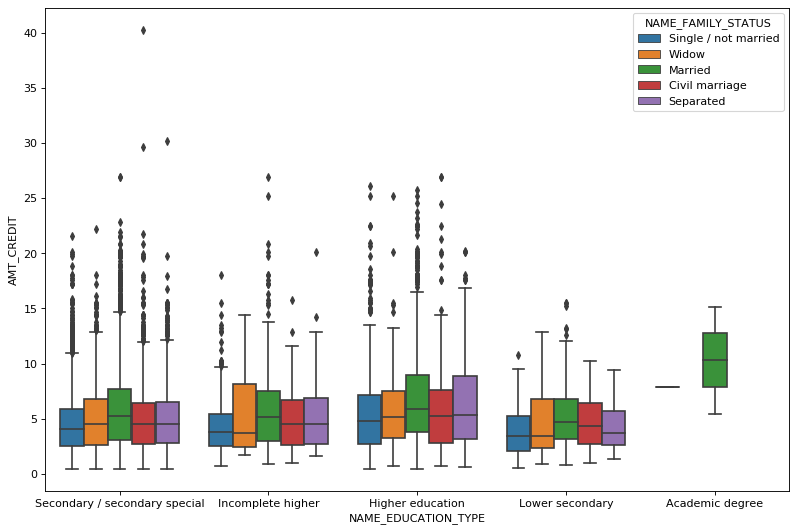

In [92]:
# set figure size for larger figure
plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')

sns.boxplot(x='NAME_EDUCATION_TYPE', y='AMT_CREDIT', hue="NAME_FAMILY_STATUS", data=Target1)
plt.show()

######  Observations
1. Married family status with Academic education type are having higher credits than others.
2. And After that married, separated are having more credits in Higher education and widow is having more credits than others in Incomplete higher.

######  Target0

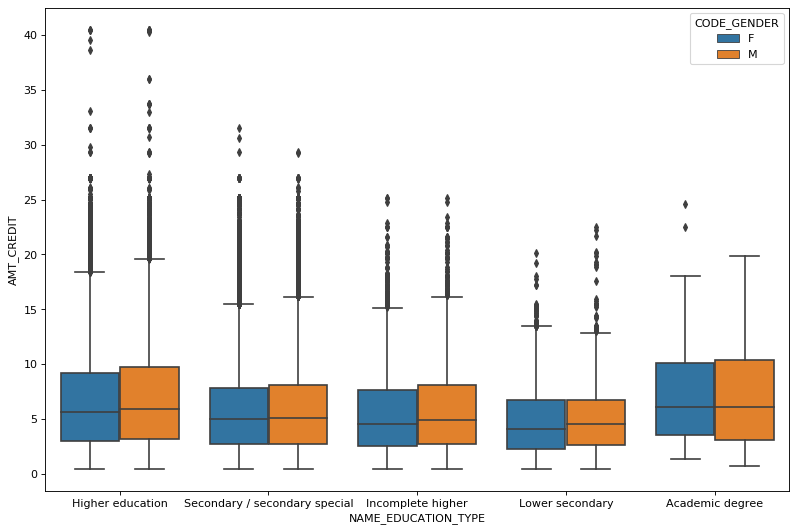

In [93]:
 # set figure size for larger figure
plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')

sns.boxplot(x='NAME_EDUCATION_TYPE', y='AMT_CREDIT', hue="CODE_GENDER", data=Target0)
plt.show()

######  Observations
1. Male and Female with Academic degree and Higher education are having more credits in Education type than others.
2. Very less credits in Lower secondary education type.

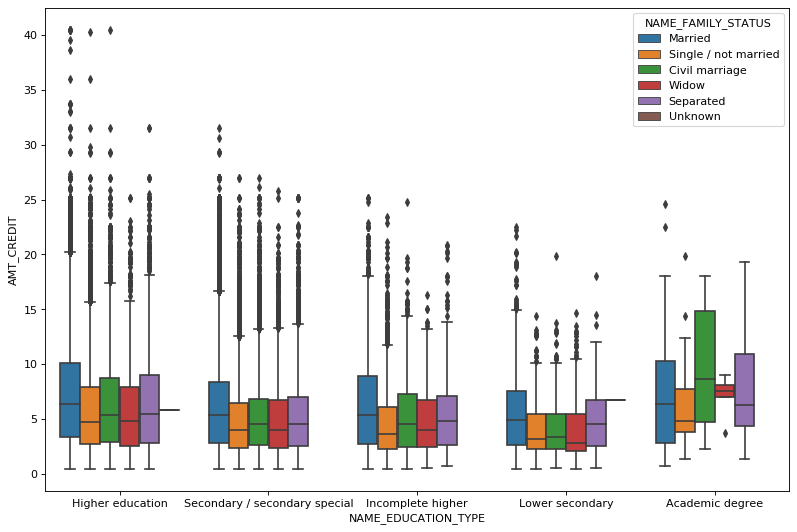

In [94]:
 # set figure size for larger figure
plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')

sns.boxplot(x='NAME_EDUCATION_TYPE', y='AMT_CREDIT', hue="NAME_FAMILY_STATUS", data=Target0)
plt.show()

######  Observations
1. Married and Civil Marriage with academic degree are having more credits than others.
2. Lower secondary education type has less credits in all family status.

######  Overall Observations - 
-  From the above Bivariate analysis on Target1 - Married with academic are having higher credits than others. And After that      married, separated and widow are having more credits than others.
-  From the above Bivariate analysis on Target1 - Female with Academic degree are having more credits than Male/Female with        other education type.
-  From the above Bivariate analysis on Target0 - Male and Female with academic degree are having more credits than others.
-  From the above Bivariate analysis on Target0 - Married and Civil Marriage with academic degree are having more credits than    others.

######  5. USING Previous_Application DATA

In [95]:
df_prev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
SK_ID_PREV                     1670214 non-null int64
SK_ID_CURR                     1670214 non-null int64
NAME_CONTRACT_TYPE             1670214 non-null object
AMT_ANNUITY                    1297979 non-null float64
AMT_APPLICATION                1670214 non-null float64
AMT_CREDIT                     1670213 non-null float64
AMT_DOWN_PAYMENT               774370 non-null float64
AMT_GOODS_PRICE                1284699 non-null float64
WEEKDAY_APPR_PROCESS_START     1670214 non-null object
HOUR_APPR_PROCESS_START        1670214 non-null int64
FLAG_LAST_APPL_PER_CONTRACT    1670214 non-null object
NFLAG_LAST_APPL_IN_DAY         1670214 non-null int64
RATE_DOWN_PAYMENT              774370 non-null float64
RATE_INTEREST_PRIMARY          5951 non-null float64
RATE_INTEREST_PRIVILEGED       5951 non-null float64
NAME_CASH_LOAN_PURPOSE         1670214 non-null object
NAME_CONTRA

In [96]:
df_prev.shape

(1670214, 37)

In [97]:
df_prev.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,...,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,...,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,...,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,...,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,...,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,...,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,...,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,...,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,...,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


In [98]:
#Find the missing value percentage in previous_application dataset.
round(100*(df_prev.isnull().sum()/len(df_prev.index)),2)

SK_ID_PREV                      0.00
SK_ID_CURR                      0.00
NAME_CONTRACT_TYPE              0.00
AMT_ANNUITY                    22.29
AMT_APPLICATION                 0.00
AMT_CREDIT                      0.00
AMT_DOWN_PAYMENT               53.64
AMT_GOODS_PRICE                23.08
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
FLAG_LAST_APPL_PER_CONTRACT     0.00
NFLAG_LAST_APPL_IN_DAY          0.00
RATE_DOWN_PAYMENT              53.64
RATE_INTEREST_PRIMARY          99.64
RATE_INTEREST_PRIVILEGED       99.64
NAME_CASH_LOAN_PURPOSE          0.00
NAME_CONTRACT_STATUS            0.00
DAYS_DECISION                   0.00
NAME_PAYMENT_TYPE               0.00
CODE_REJECT_REASON              0.00
NAME_TYPE_SUITE                49.12
NAME_CLIENT_TYPE                0.00
NAME_GOODS_CATEGORY             0.00
NAME_PORTFOLIO                  0.00
NAME_PRODUCT_TYPE               0.00
CHANNEL_TYPE                    0.00
SELLERPLACE_AREA                0.00
N

In [99]:
df_prev=df_prev.loc[:,df_prev.isnull().mean()<=0.5]
df_prev

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,SATURDAY,15,Y,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,THURSDAY,11,Y,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,TUESDAY,11,Y,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,MONDAY,7,Y,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,THURSDAY,9,Y,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1670209,2300464,352015,Consumer loans,14704.290,267295.5,311400.0,267295.5,WEDNESDAY,12,Y,...,Furniture,30.0,low_normal,POS industry with interest,365243.0,-508.0,362.0,-358.0,-351.0,0.0
1670210,2357031,334635,Consumer loans,6622.020,87750.0,64291.5,87750.0,TUESDAY,15,Y,...,Furniture,12.0,middle,POS industry with interest,365243.0,-1604.0,-1274.0,-1304.0,-1297.0,0.0
1670211,2659632,249544,Consumer loans,11520.855,105237.0,102523.5,105237.0,MONDAY,12,Y,...,Consumer electronics,10.0,low_normal,POS household with interest,365243.0,-1457.0,-1187.0,-1187.0,-1181.0,0.0
1670212,2785582,400317,Cash loans,18821.520,180000.0,191880.0,180000.0,WEDNESDAY,9,Y,...,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-1155.0,-825.0,-825.0,-817.0,1.0


In [100]:
round(100*(df_prev.isnull().sum()/len(df_prev.index)),2)

SK_ID_PREV                      0.00
SK_ID_CURR                      0.00
NAME_CONTRACT_TYPE              0.00
AMT_ANNUITY                    22.29
AMT_APPLICATION                 0.00
AMT_CREDIT                      0.00
AMT_GOODS_PRICE                23.08
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
FLAG_LAST_APPL_PER_CONTRACT     0.00
NFLAG_LAST_APPL_IN_DAY          0.00
NAME_CASH_LOAN_PURPOSE          0.00
NAME_CONTRACT_STATUS            0.00
DAYS_DECISION                   0.00
NAME_PAYMENT_TYPE               0.00
CODE_REJECT_REASON              0.00
NAME_TYPE_SUITE                49.12
NAME_CLIENT_TYPE                0.00
NAME_GOODS_CATEGORY             0.00
NAME_PORTFOLIO                  0.00
NAME_PRODUCT_TYPE               0.00
CHANNEL_TYPE                    0.00
SELLERPLACE_AREA                0.00
NAME_SELLER_INDUSTRY            0.00
CNT_PAYMENT                    22.29
NAME_YIELD_GROUP                0.00
PRODUCT_COMBINATION             0.02
D

In [101]:
#Merging application and previous_application datasets in to one using Inner join.
Merge_df=pd.merge(df_app,df_prev,how='inner',on='SK_ID_CURR')
Merge_df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,Cash loans,M,N,Y,0,2.025,4.065975,24700.5,...,Auto technology,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0
1,100003,0,Cash loans,F,N,N,0,2.700,12.935025,35698.5,...,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-716.0,-386.0,-536.0,-527.0,1.0
2,100003,0,Cash loans,F,N,N,0,2.700,12.935025,35698.5,...,Furniture,6.0,middle,POS industry with interest,365243.0,-797.0,-647.0,-647.0,-639.0,0.0
3,100003,0,Cash loans,F,N,N,0,2.700,12.935025,35698.5,...,Consumer electronics,12.0,middle,POS household with interest,365243.0,-2310.0,-1980.0,-1980.0,-1976.0,1.0
4,100004,0,Revolving loans,M,Y,Y,0,0.675,1.350000,6750.0,...,Connectivity,4.0,middle,POS mobile without interest,365243.0,-784.0,-694.0,-724.0,-714.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1413696,456255,0,Cash loans,F,N,N,0,1.575,6.750000,49117.5,...,XNA,24.0,middle,Cash X-Sell: middle,365243.0,-618.0,72.0,-558.0,-528.0,1.0
1413697,456255,0,Cash loans,F,N,N,0,1.575,6.750000,49117.5,...,Connectivity,0.0,XNA,Card Street,NaN,NaN,NaN,NaN,NaN,NaN
1413698,456255,0,Cash loans,F,N,N,0,1.575,6.750000,49117.5,...,XNA,60.0,low_normal,Cash Street: low,NaN,NaN,NaN,NaN,NaN,NaN
1413699,456255,0,Cash loans,F,N,N,0,1.575,6.750000,49117.5,...,XNA,36.0,low_normal,Cash X-Sell: low,365243.0,-756.0,294.0,-66.0,-64.0,0.0


In [102]:
# Column has negative value and making into positive.
df_prev['DAYS_DECISION']=df_prev['DAYS_DECISION'].abs()

In [103]:
# Column has negative value and making into positive.
df_prev['SELLERPLACE_AREA']=df_prev['SELLERPLACE_AREA'].abs()

In [104]:
#Renaming columns name in Merge dataset
New_Df = Merge_df.rename({'NAME_CONTRACT_TYPE_x' : 'NAME_CONTRACT_TYPE','AMT_CREDIT_x':'AMT_CREDIT','AMT_ANNUITY_x':'AMT_ANNUITY',
                         'WEEKDAY_APPR_PROCESS_START_x' : 'WEEKDAY_APPR_PROCESS_START',
                         'HOUR_APPR_PROCESS_START_x':'HOUR_APPR_PROCESS_START','NAME_CONTRACT_TYPE_x':'NAME_CONTRACT_TYPE_PREV',
                         'AMT_CREDIT_x':'AMT_CREDIT_PREV','AMT_ANNUITY_x':'AMT_ANNUITY_PREV',
                         'WEEKDAY_APPR_PROCESS_START_x':'WEEKDAY_APPR_PROCESS_START_PREV',
                         'HOUR_APPR_PROCESS_START_x':'HOUR_APPR_PROCESS_START_PREV'}, axis=1)

In [105]:
#Delete Ununsed columns from previous_application
New_Df.drop(['SK_ID_CURR','WEEKDAY_APPR_PROCESS_START_y', 'HOUR_APPR_PROCESS_START_y','REG_REGION_NOT_LIVE_REGION', 
              'REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
              'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY','WEEKDAY_APPR_PROCESS_START_PREV',
              'HOUR_APPR_PROCESS_START_PREV', 'FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY',
              'DAYS_FIRST_DRAWING','DAYS_FIRST_DUE','DAYS_LAST_DUE_1ST_VERSION','DAYS_LAST_DUE','DAYS_TERMINATION','NFLAG_INSURED_ON_APPROVAL'],axis=1,inplace=True)
New_Df

,TARGET,NAME_CONTRACT_TYPE_PREV,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_PREV,AMT_ANNUITY_PREV,AMT_GOODS_PRICE_x,...,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,1,Cash loans,M,N,Y,0,2.025,4.065975,24700.5,3.510,...,New,Vehicles,POS,XNA,Stone,500,Auto technology,24.0,low_normal,POS other with interest
1,0,Cash loans,F,N,N,0,2.700,12.935025,35698.5,11.295,...,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,low_normal,Cash X-Sell: low
2,0,Cash loans,F,N,N,0,2.700,12.935025,35698.5,11.295,...,Refreshed,Furniture,POS,XNA,Stone,1400,Furniture,6.0,middle,POS industry with interest
3,0,Cash loans,F,N,N,0,2.700,12.935025,35698.5,11.295,...,Refreshed,Consumer Electronics,POS,XNA,Country-wide,200,Consumer electronics,12.0,middle,POS household with interest
4,0,Revolving loans,M,Y,Y,0,0.675,1.350000,6750.0,1.350,...,New,Mobile,POS,XNA,Regional / Local,30,Connectivity,4.0,middle,POS mobile without interest
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1413696,0,Cash loans,F,N,N,0,1.575,6.750000,49117.5,6.750,...,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,24.0,middle,Cash X-Sell: middle
1413697,0,Cash loans,F,N,N,0,1.575,6.750000,49117.5,6.750,...,Repeater,XNA,Cards,walk-in,Country-wide,20,Connectivity,0.0,XNA,Card Street
1413698,0,Cash loans,F,N,N,0,1.575,6.750000,49117.5,6.750,...,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,60.0,low_normal,Cash Street: low
1413699,0,Cash loans,F,N,N,0,1.575,6.750000,49117.5,6.750,...,Repeater,XNA,Cash,x-sell,AP+ (Cash loan),6,XNA,36.0,low_normal,Cash X-Sell: low


######  i. Univariate and Bivariate  Analysis on Merge dataset

In [106]:
# Removing the column values of 'XNA' and 'XAP' present in column NAME_CASH_LOAN_PURPOSE.

New_Df=New_Df.drop(New_Df[New_Df['NAME_CASH_LOAN_PURPOSE']=='XNA'].index)
New_Df=New_Df.drop(New_Df[New_Df['NAME_CASH_LOAN_PURPOSE']=='XAP'].index)

In [107]:
New_Df.head()

,TARGET,NAME_CONTRACT_TYPE_PREV,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_PREV,AMT_ANNUITY_PREV,AMT_GOODS_PRICE_x,...,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
99,0,Revolving loans,M,N,Y,0,0.900,1.800000,9000.0,1.800,...,New,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,6.0,high,Cash Street: high
110,0,Cash loans,F,N,Y,0,2.925,6.658920,24592.5,4.770,...,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,60.0,low_action,Cash Street: low
136,0,Cash loans,M,Y,N,1,3.600,7.333155,39069.0,6.795,...,Refreshed,XNA,Cash,walk-in,Channel of corporate sales,-1,XNA,42.0,low_normal,Cash Street: low
159,0,Revolving loans,M,Y,Y,0,1.800,5.400000,27000.0,5.400,...,New,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,18.0,low_normal,Cash Street: low
160,0,Revolving loans,M,Y,Y,0,1.800,5.400000,27000.0,5.400,...,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,low_normal,Cash Street: low


In [108]:
New_Df.nunique().sort_values()

NAME_CONTRACT_TYPE_y              1
NAME_GOODS_CATEGORY               1
TARGET                            2
NAME_CONTRACT_TYPE_PREV           2
CODE_GENDER                       2
FLAG_OWN_CAR                      2
FLAG_OWN_REALTY                   2
NAME_PORTFOLIO                    2
AMT_REQ_CREDIT_BUREAU_HOUR        3
NAME_PRODUCT_TYPE                 3
NAME_CLIENT_TYPE                  4
NAME_PAYMENT_TYPE                 4
NAME_CONTRACT_STATUS              4
NAME_EDUCATION_TYPE               5
NAME_FAMILY_STATUS                5
NAME_YIELD_GROUP                  5
NAME_HOUSING_TYPE                 6
AMT_INCOME_RANGE                  6
NAME_INCOME_TYPE                  6
NAME_TYPE_SUITE_y                 7
AMT_REQ_CREDIT_BUREAU_DAY         7
CHANNEL_TYPE                      7
AMT_REQ_CREDIT_BUREAU_QRT         7
AMT_REQ_CREDIT_BUREAU_WEEK        7
PRODUCT_COMBINATION               7
NAME_TYPE_SUITE_x                 7
NAME_SELLER_INDUSTRY              8
CNT_CHILDREN                

######  Univariate analysis on Merge Dataset

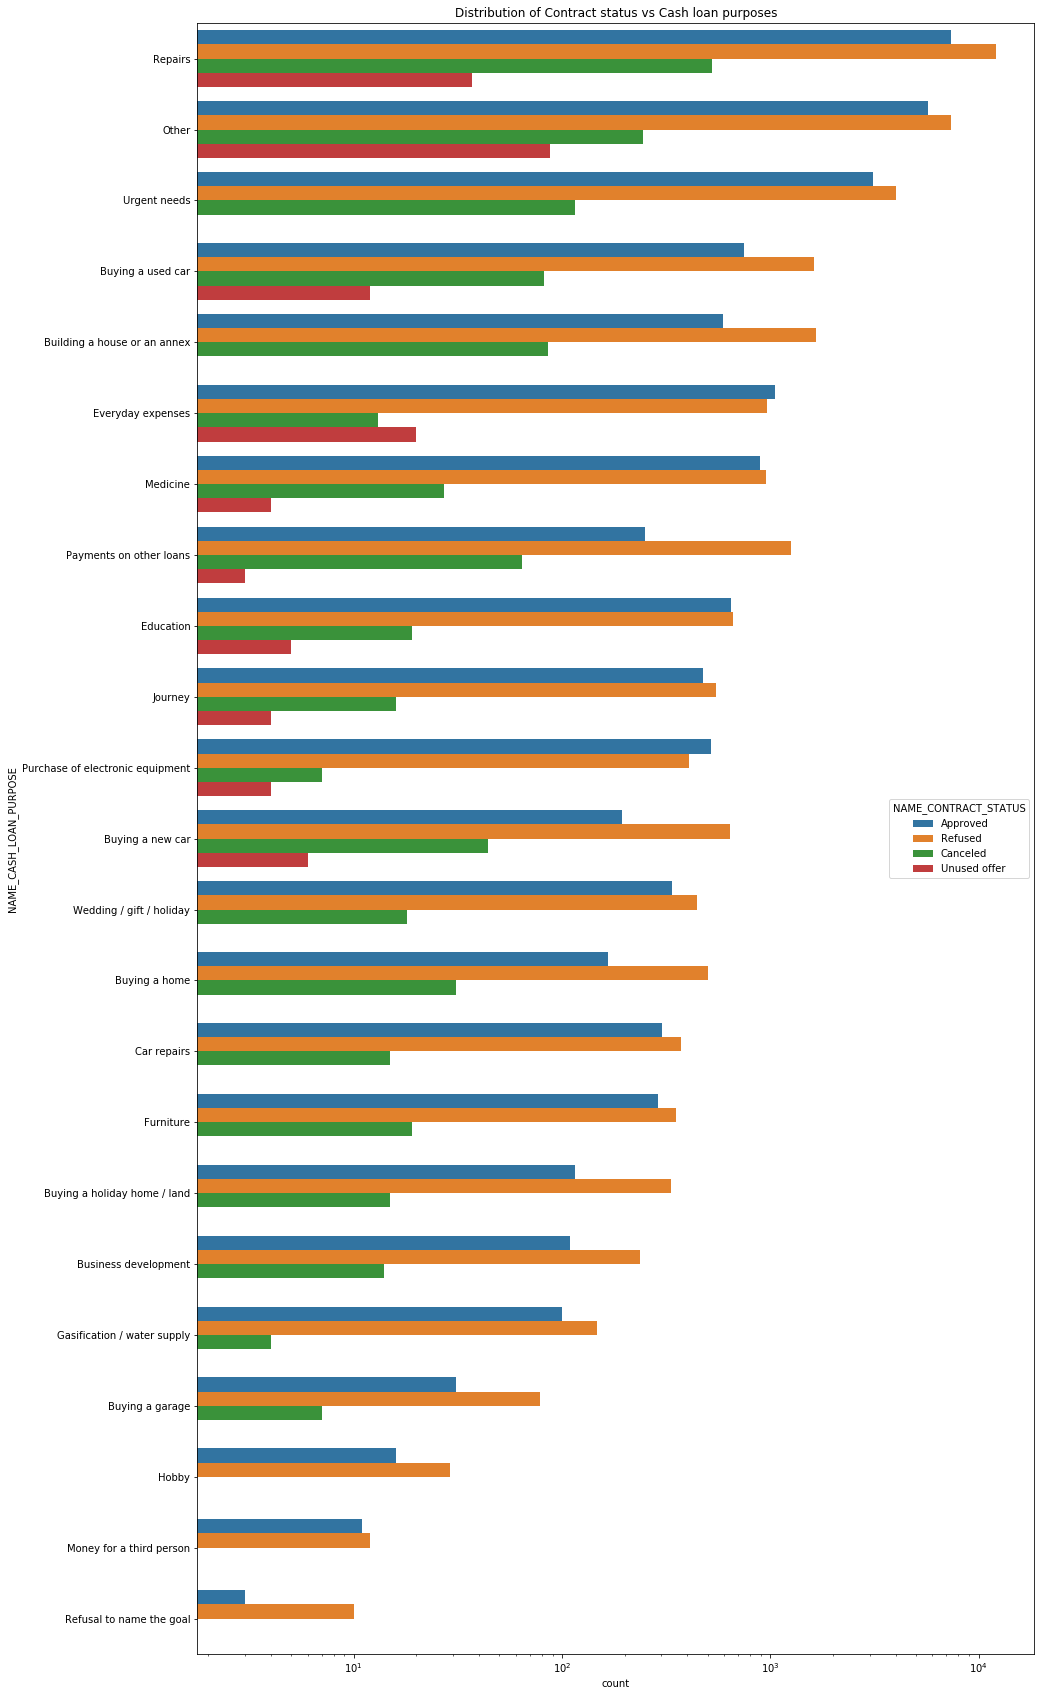

In [109]:
plt.figure(figsize=(15,30))
plt.xscale('log')
plt.title('Distribution of Contract status vs Cash loan purposes')
sns.countplot(data = New_Df, y= 'NAME_CASH_LOAN_PURPOSE',order=New_Df['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'NAME_CONTRACT_STATUS')
plt.show()

######  Observation
-  From the above Univariate analysis on Merge Dataset - Purpose 'Repairs' has more no. of loan rejection And                      for Education purpose we have equal no of Approved and Refused loans.
-  Everyday expenses are more approved than refused contract status.
-  Customers are spending very less on cash loans type of Refusal to name the goal. 

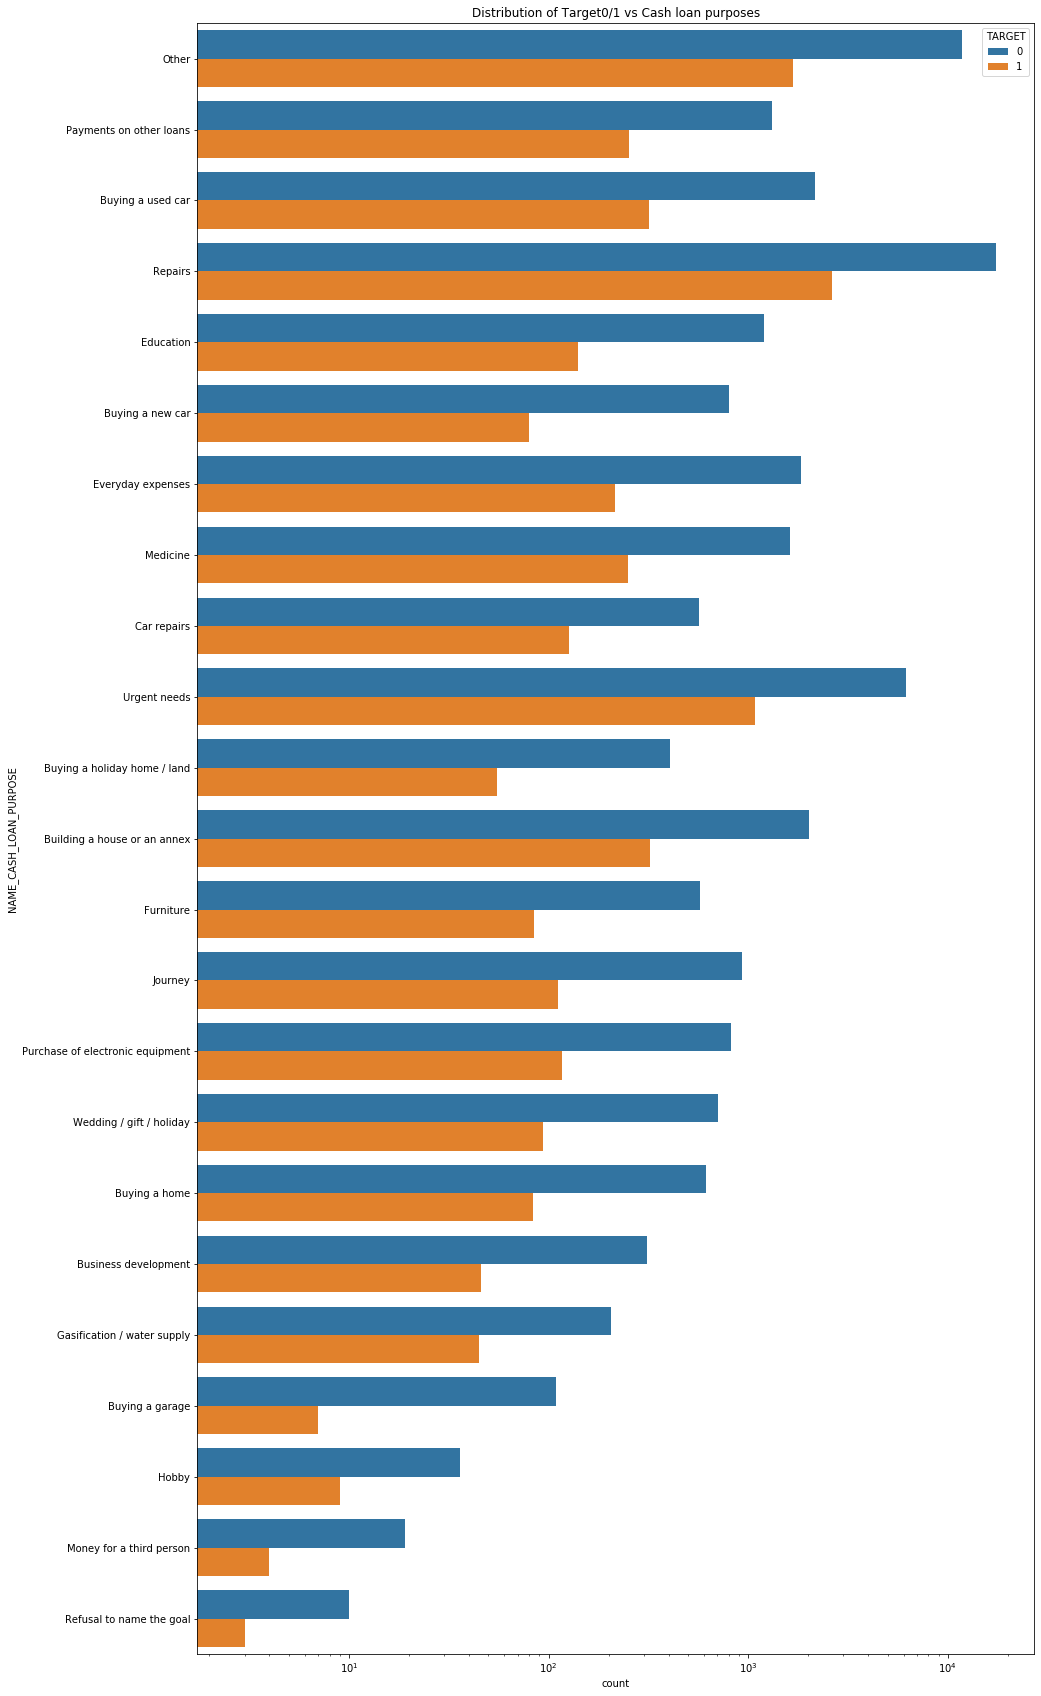

In [110]:
plt.figure(figsize=(15,30))
plt.xscale('log')
plt.title('Distribution of Target0/1 vs Cash loan purposes')
sns.countplot(data = New_Df, y= 'NAME_CASH_LOAN_PURPOSE',hue = 'TARGET')
plt.show()

######  Observations
-  From the above Univariate analysis on Merge Dataset-Loan Purpose 'Repairs' are having more difficulties at the time of          payment.
-  And for education purpose we have equal no of approved and Refused loans.
-  Purchase of electronic equipments and everyday expenses has more approved rate than refused, cancelled or ununsed offers.
-  Buying a new car and Refusal to name the goal are more likely to be refused more than approved.

######  Bivariate analysis using Merge dataset

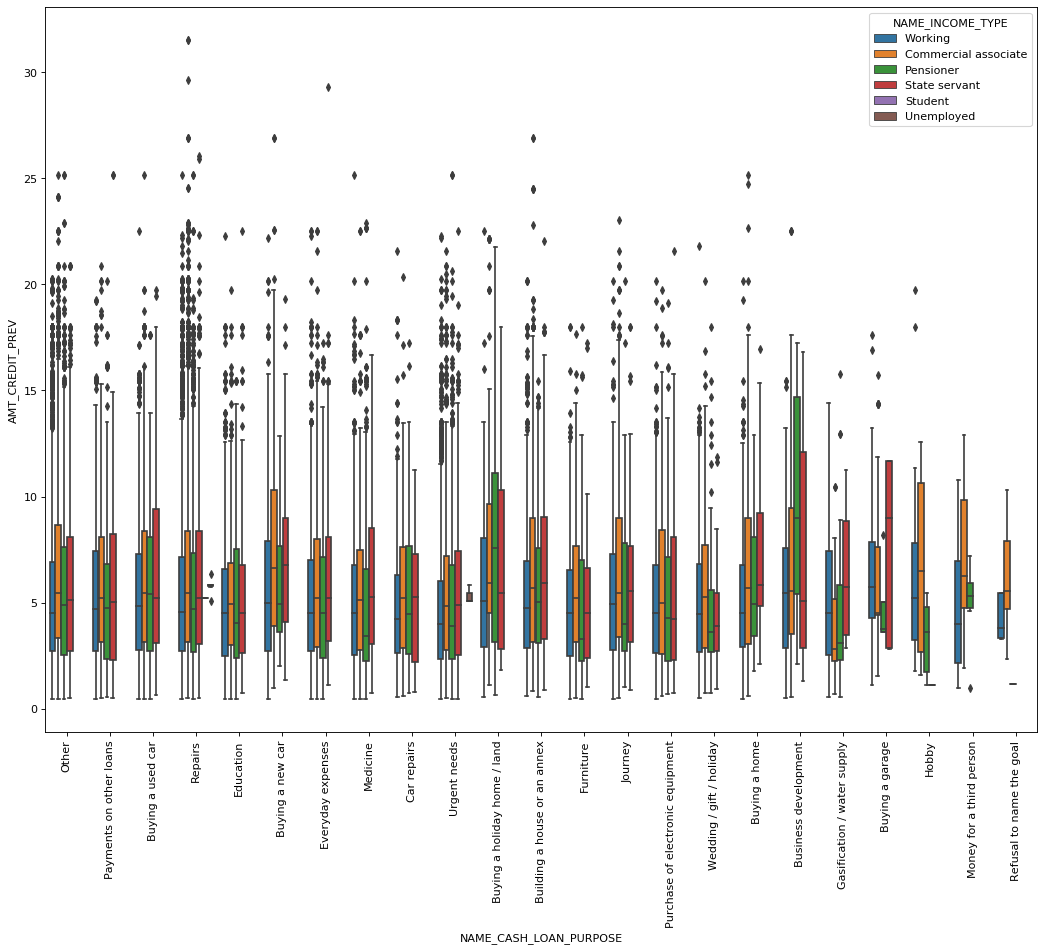

In [111]:
# Box plotting for Credit amount in logarithmic scale
# set figure size for larger figure
plt.figure(num=None, figsize=(16, 12), dpi=80, facecolor='w', edgecolor='k')
plt.xticks(rotation=90)
sns.boxplot(x='NAME_CASH_LOAN_PURPOSE', y='AMT_CREDIT_PREV', hue="NAME_INCOME_TYPE", data=New_Df)
plt.show()

######  Observations

-  Business development and Buying a holiday home or land are having more credits than other cash loan purpose.
-  Very less credits on Refusal to name the goal cash loan purpose.
-  Buying a new car , buying a used car , everyday expenses , urgent needs , Building a house or an annex and joourney all        these columns are having significant amount of credits.

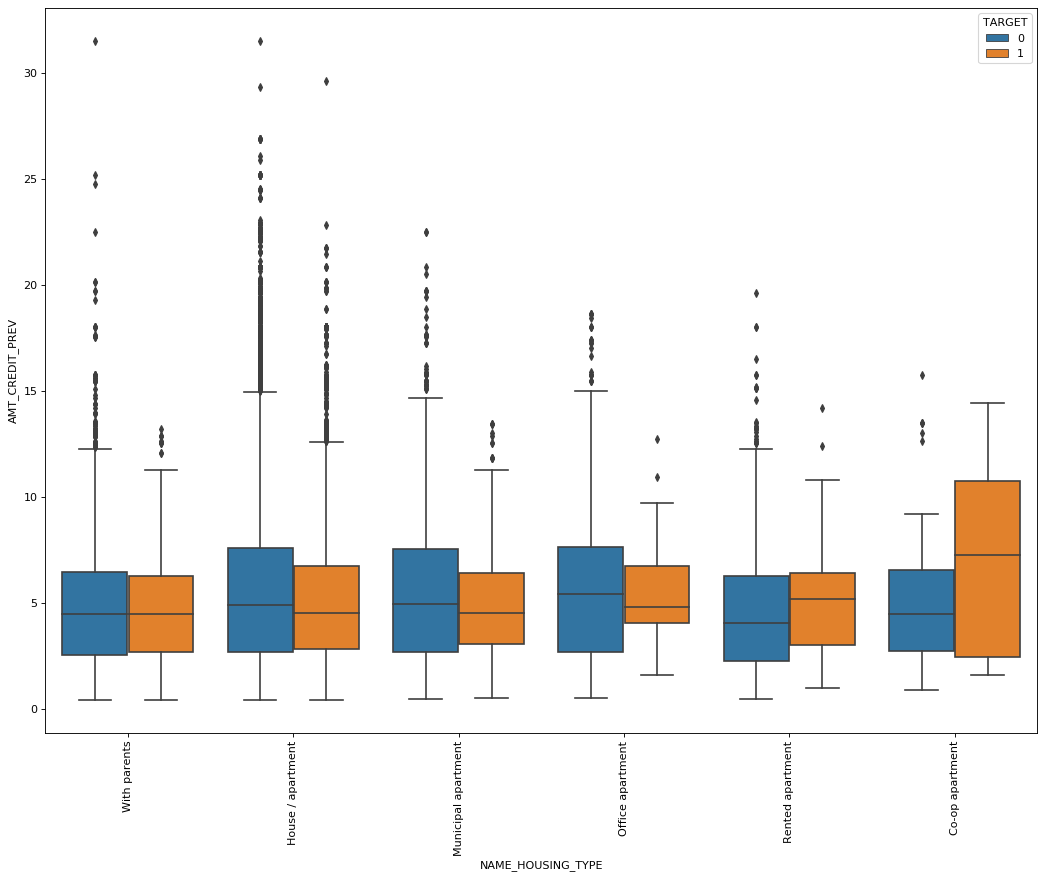

In [112]:
# Box plotting for Credit amount prev vs Housing type in logarithmic scale

plt.figure(num=None, figsize=(16, 12), dpi=80, facecolor='w', edgecolor='k')
plt.xticks(rotation=90)
# specify hue="categorical_variable"
sns.boxplot(x='NAME_HOUSING_TYPE', y='AMT_CREDIT_PREV', hue="TARGET", data=New_Df)
plt.show()

######  Observations
-  From the above bivariate analysis Co-op apartment are having more credit for Target1.
-  House/apartment , Municipal apartment and office apartment are having more credits for Target0.
-  Very less credits present in office apartment for Target1.
-  And Co-op apartment has very less credits for Target0.

###### CONCLUSION

1. Bank should provide priority to Housing type With Parents. House/apartment , Municipal and Office apartment customers for      loans as they are having more no. of successfull transactions as compared to Co-op apartment.
2. Bank Should focus on cash loan purpose for Buying a Business development , holiday home or land and buying a new car            customers as they have less no of unsuccessfull transactions.
3. Banks should consider contract type Student , Pensioner and Commercial Associate with housing type other than Co-op            apartment for more successful transactions.
4. Bank should provide less priority to Repairs and Urgent need in Cash loan purposes and Income Type - Working are having more    no. of unsuccessful transactions .
5. Bank should consider giving loans to customers who are having academic degree or higher education.

-  Developed by Pritamkumar Suryavanshi and Abhishek N R for Credit EDA Case Study for Upgrad PGDDD March 2020.